<a href="https://colab.research.google.com/github/TheJoys2019/DS-Unit-2-Sprint-4-Practicing-Understanding/blob/master/Artin_Sinani_Tanzania_Water_Pump_Predictive_Model_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [5]:
# Install category_encoders 
!pip install category_encoders

     |████████████████████████████████| 92kB 5.7MB/s 


In [0]:
# Machine Learning Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
#from sklearn.model_selection import 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Encoder and Random Library
import category_encoders as ce
from scipy.stats import randint

# Standard Libraries
import pandas as pd
import numpy as np
import random

In [7]:
# Import Train/Test Datasets
X_train = ("https://raw.githubusercontent.com/TheJoys2019/DS-Unit-2-Sprint-4-Practicing-Understanding/master/train_features.csv")
X_test = ('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-2-Sprint-4-Practicing-Understanding/master/test_features.csv')
y_train = ("https://raw.githubusercontent.com/TheJoys2019/DS-Unit-2-Sprint-4-Practicing-Understanding/master/train_labels.csv")

X_train = pd.read_csv(X_train)
X_test = pd.read_csv(X_test)
y_train = pd.read_csv(y_train)

# Verify if data loaded
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [0]:
# Display 100 columns
pd.set_option('display.max_columns', 100)

# Quick Exploratory Analysis

In [0]:
# Use Describe to analyze if any irregularities arise
X_train.describe(), X_test.describe()

(                 id     amount_tsh    gps_height     longitude      latitude  \
 count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
 mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
 std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
 min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
 25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
 50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
 75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
 max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   
 
         num_private   region_code  district_code    population  \
 count  59400.000000  59400.000000   59400.000000  59400.000000   
 mean       0.474141     15.297003       5.629747    179.909983   
 std       12.236230     17.587406       9.633649    471.482176   
 

In [0]:
# Check attributes of all features
X_train.info(), X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

(None, None)

In [0]:
# Get a feel for the unique values
X_train.nunique(), X_test.nunique()

(id                       59400
 amount_tsh                  98
 date_recorded              356
 funder                    1897
 gps_height                2428
 installer                 2145
 longitude                57516
 latitude                 57517
 wpt_name                 37400
 num_private                 65
 basin                        9
 subvillage               19287
 region                      21
 region_code                 27
 district_code               20
 lga                        125
 ward                      2092
 population                1049
 public_meeting               2
 recorded_by                  1
 scheme_management           12
 scheme_name               2696
 permit                       2
 construction_year           55
 extraction_type             18
 extraction_type_group       13
 extraction_type_class        7
 management                  12
 management_group             5
 payment                      7
 payment_type                 7
 water_q

In [0]:
# Get a Null/Nan Report
X_train.isna().sum(), X_test.isna().sum()

(id                           0
 amount_tsh                   0
 date_recorded                0
 funder                    3635
 gps_height                   0
 installer                 3655
 longitude                    0
 latitude                     0
 wpt_name                     0
 num_private                  0
 basin                        0
 subvillage                 371
 region                       0
 region_code                  0
 district_code                0
 lga                          0
 ward                         0
 population                   0
 public_meeting            3334
 recorded_by                  0
 scheme_management         3877
 scheme_name              28166
 permit                    3056
 construction_year            0
 extraction_type              0
 extraction_type_group        0
 extraction_type_class        0
 management                   0
 management_group             0
 payment                      0
 payment_type                 0
 water_q

# Feature Engineering

In [0]:

"""
In order to create a predictive model that can achieve a higher accuracy score
I was forced to engineer a few features. These engineered features are strategically 
created with the mindset to allow the model to make better decisions. 
The additional features will help increase my accuracy score from a .71.  

"""
# FE1: Age = Current Year - Construction Year
X_train['age'] = 2018 - X_train['construction_year']
X_test['age'] =  2018 - X_test['construction_year']
"""
"""
# FE2: Return True or False if there's construction
X_train['is_construct'] = X_train['construction_year'] != 0
X_test['is_construct'] = X_test['construction_year'] != 0

"""
"""
# FE3: Water Per Person
X_train['Water_per_person'] = X_train['amount_tsh']/X_train['population']
X_test['Water_per_person'] = X_test['amount_tsh']/X_test['population']
"""
Cleaning Feature Engineered Data Below
"""
# NaNs with 0 
X_train['Water_per_person'] = X_train['Water_per_person'].replace(np.nan, 0)
X_test['Water_per_person'] = X_test['Water_per_person'].replace(np.nan, 0)

# Replace 2018 into 0 
X_train['age'] = X_train['age'].replace(2018,0)
X_test['age'] = X_test['age'].replace(2018,0)

# As division by 0 creates infinity, let's replace with nan
X_train['Water_per_person'] = X_train['Water_per_person'].replace([np.inf, -np.inf], np.nan)
X_test['Water_per_person'] = X_test['Water_per_person'].replace([np.inf, -np.inf], np.nan)


In [0]:
# Modify Dates with datetime function
X_train['date_recorded'] = pd.to_datetime(X_train['date_recorded'], infer_datetime_format=True)
X_test['date_recorded'] = pd.to_datetime(X_test['date_recorded'], infer_datetime_format=True)

X_train['week'] = X_train['date_recorded'].apply(lambda x: x.week)
X_test['week'] = X_test['date_recorded'].apply(lambda x: x.week)

X_train['month'] = X_train['date_recorded'].apply(lambda x: x.month)
X_test['month'] = X_test['date_recorded'].apply(lambda x: x.month)

# Modify to str so RFC can process error free
X_train['date_recorded']= X_train['date_recorded'].astype(str)
X_test['date_recorded'] = X_test['date_recorded'].astype(str)

In [10]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 45 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

(None, None)

# Addressing Nulls/NaNs and Replacing Zeros with Mean Values

In [0]:
"""
Addressing Nulls/Nans: First concatting train/test to get mean
"""
X_train['public_meeting'] = X_train['public_meeting'].fillna(lambda x: random.choice(X_train[X_train['public_meeting'] != np.nan])['public_meeting'])
X_test['public_meeting'] = X_test['public_meeting'].fillna(lambda x: random.choice(X_test[X_test['public_meeting'] != np.nan])['public_meeting'])

X_train['permit'] = X_train['permit'].fillna(lambda x: random.choice(X_train[X_train['permit'] != np.nan])['permit'])
X_test['permit'] = X_test['permit'].fillna(lambda x: random.choice(X_test[X_test['permit'] != np.nan])['permit'])


"""
Replacing Zeros with Mean Values
"""
X_train['age'] = X_train['age'].replace(0, round(pd.concat([X_train,X_test])['age'].mean()))
X_test['age'] = X_test['age'].replace(0, round(pd.concat([X_train,X_test])['age'].mean()))

X_train['gps_height'] = X_train['gps_height'].replace(0, round(pd.concat([X_train,X_test])['gps_height'].mean()))
X_test['gps_height'] = X_test['gps_height'].replace(0, round(pd.concat([X_train,X_test])['gps_height'].mean()))

# Drop Columns & Split Training and Validation Sets

In [0]:
"""
Dropping columns that are seen as redundant/irrelevant and 
are of a low permutation importance.

""" 
drop_cols = ['id',
             'num_private',
             'amount_tsh', 
             'wpt_name',
             'subvillage',
             'management_group',
             'quantity_group',
             'construction_year',
             'recorded_by']

X_train = X_train.drop(columns=drop_cols)
X_test = X_test.drop(columns=drop_cols)
y_train = y_train.drop(columns='id')


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)

# (1)Encode, (2) Fit/Transform, (3) Scale

In [0]:
"""
Encoding categorical features
"""
encoder = ce.OrdinalEncoder()



"""
Fitting and transforming X_train
"""
X_train = encoder.fit_transform(X_train)


"""
Scale:
Based on prior tests of scaling several features I've noticed that accuracy score 
lowers if non-continuous features are used.
"""
cont_col = ['age','week','gps_height','month','population']
scaled = MinMaxScaler()
X_train[cont_col] = scaled.fit_transform(X_train[cont_col])

# RSCV / RFC

In [0]:
# Define parameters 
param_distributions = {
    'n_estimators': [300,325,350,375,400],
    'max_depth': [15,20,25]
}

# Model RFC
model = RandomForestClassifier(n_jobs=-1, random_state=42)

# RSCV
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    scoring='accuracy',
    n_iter=15,
    n_jobs=-1,
    cv=5,
    verbose=10,
    return_train_score=True,
    random_state=42
)

#fit to training data
search.fit(X_train, y_train)
#Score
print('Train Accuracy Score:', search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  8.8min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 

Training Accuracy Score: 0.8101220538720538


In [0]:
# Results
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,54.264925,0.162333,1.455883,0.103585,375,20,"{'n_estimators': 375, 'max_depth': 20}",0.811172,0.809363,0.808482,0.813848,0.807745,0.810122,0.002186,1,0.962303,0.963172,0.962569,0.964779,0.964516,0.963468,0.001007
7,50.374320,0.368179,1.403445,0.010083,350,20,"{'n_estimators': 350, 'max_depth': 20}",0.810751,0.809679,0.807745,0.813743,0.807640,0.809912,0.002249,2,0.962172,0.963251,0.963148,0.964542,0.964674,0.963557,0.000938
9,57.284551,0.831415,1.583822,0.076482,400,20,"{'n_estimators': 400, 'max_depth': 20}",0.810646,0.809574,0.807429,0.814164,0.807534,0.809870,0.002471,3,0.962803,0.963409,0.962701,0.964963,0.964858,0.963747,0.000981
5,42.960325,0.498481,1.208480,0.040617,300,20,"{'n_estimators': 300, 'max_depth': 20}",0.810330,0.809995,0.807324,0.813533,0.807745,0.809785,0.002218,4,0.962435,0.963225,0.963306,0.964490,0.965095,0.963710,0.000954
6,47.277363,0.351777,1.314977,0.046125,325,20,"{'n_estimators': 325, 'max_depth': 20}",0.810541,0.809574,0.807324,0.814164,0.806798,0.809680,0.002635,5,0.962540,0.963251,0.962754,0.964647,0.964779,0.963594,0.000943


# Validate Accuracy of Test Set

In [0]:
# Fit
X_val = encoder.transform(X_val)
X_val[continuous_col] = scaled.fit_transform(X_val[continuous_col])

In [0]:
# Test Validation
best = search.best_estimator_
y_pred = best.predict(X_val)
print('Validation Set Accuracy Score:', accuracy_score(y_val, y_pred))

Validation Set Accuracy Score: 0.813973063973064


In [0]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance


permuter = PermutationImportance(best, scoring='accuracy', cv='prefit', n_iter=3,
                                 random_state=42)

permuter.fit(X_val, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1008 ± 0.0034,quantity
0.0159 ± 0.0018,age
0.0134 ± 0.0032,extraction_type_class
0.0113 ± 0.0004,Water_per_person
0.0113 ± 0.0012,waterpoint_type
0.0099 ± 0.0002,longitude
0.0065 ± 0.0007,latitude
0.0046 ± 0.0020,waterpoint_type_group
0.0040 ± 0.0002,population
0.0038 ± 0.0003,lga


In [0]:
best = search.best_estimator_
X_test = encoder.transform(X_test)
X_test[continuous_col] = scaled.fit_transform(X_test[continuous_col])
y_pred_test = best.predict(X_test)

In [0]:
#Submission

sample_submission = pd.read_csv('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-2-Sprint-4-Practicing-Understanding/master/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred_test
submission.to_csv('Sinani Submission.csv', index=False)



#Visualizations

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
y_train.columns

Index(['status_group'], dtype='object')

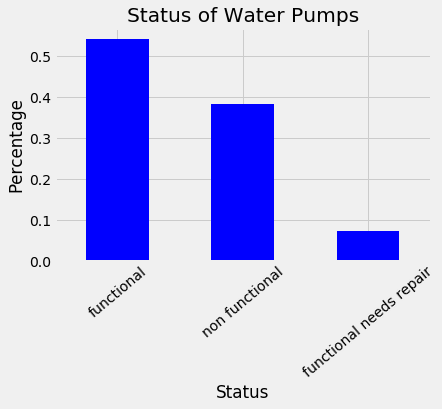

In [67]:
# Visualization 1
ax = y_train['status_group'].value_counts(normalize=True).plot(kind='bar', color='blue')
ax.set_title('Status of Water Pumps')
ax.set_xlabel('Status')
ax.set_ylabel('Percentage')
plt.xticks(rotation=40);

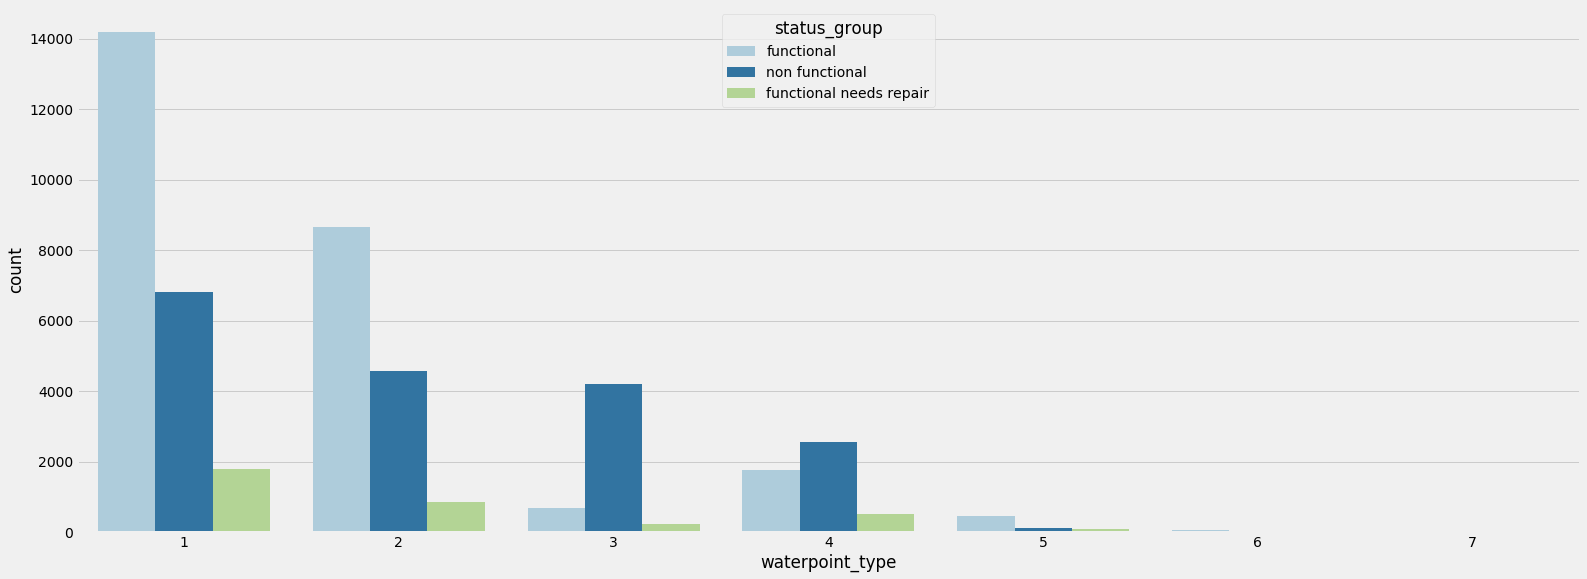

In [95]:
plt.figure(figsize=(24, 9))

sns.countplot(data=y_train,x=X_train['waterpoint_type'],hue='status_group')


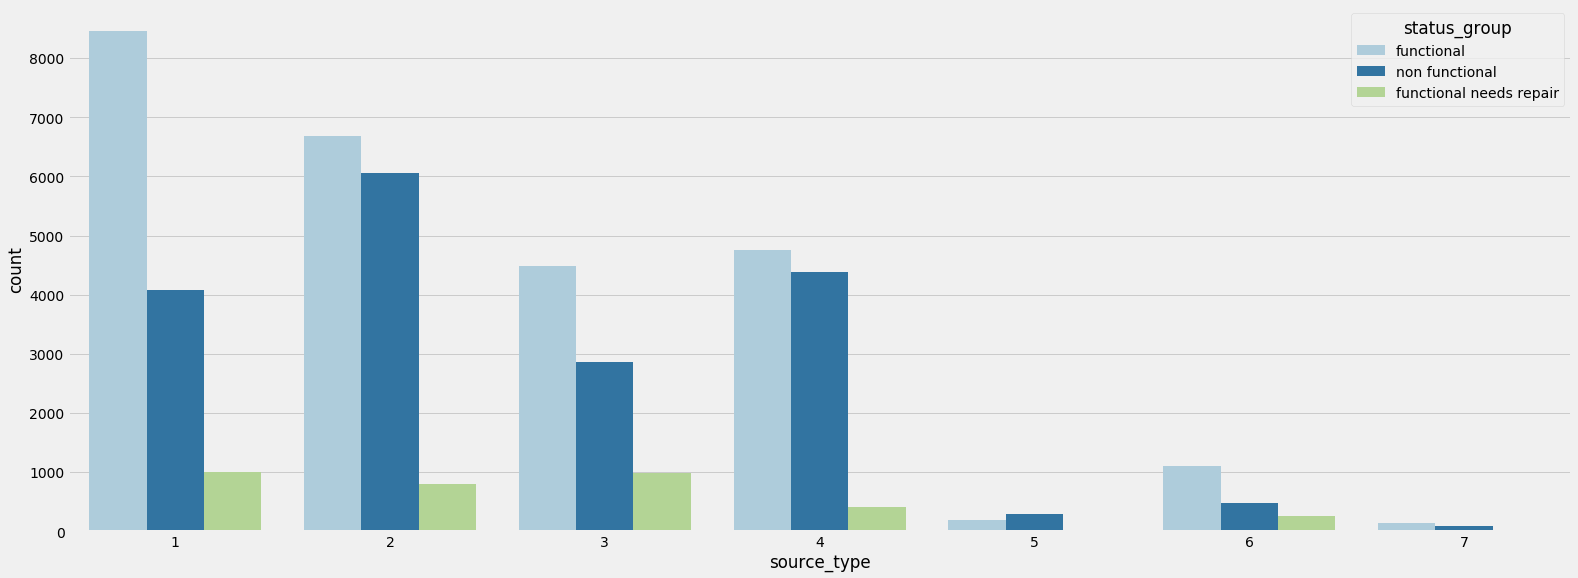

In [98]:
plt.figure(figsize=(24, 9))

sns.countplot(data=y_train,x=X_train['source_type'],hue='status_group')